# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Inventory Acquistion is the highest expense for a car delaership. This cost includes the cost of the inventory, required space and supporting functions. Car delaers would typically want to be able to swap and recycle their inventory, however, if a dealer does not understand the market trend or what customers want then this could end up being a losing business.

There are many environmental factors that plays in car delaership sucesss, however, in this expercise assuming all car delaerships are equal, we are going to look at what are the most important features that customers look into a car. this i

Features, could include anything fro Customers budget, to the 'type' of the vehicle. In this exercise, we are looking into what are the key features customers most value in the used car market

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### My Data Understanding
    What Features the Data include from business prespective
    What are those feature are relevant to determining the result of this task
    What are the features in the Dataset that could be noise
    What is the size of the Dataset
    How many Nulls are there.
#### Data Types
    Given that we have to use Data Modeling, we need to understand Data types
    Ensure that Data Types are accuretly presented
#### Data Quality
    Data Quality is as important of Data Types
    Does the Data represent the features
    Are there any NULLs
        Do we remove Nulls, or use different techniques to populate missing fields
    Should I convert the features or how is the best to transform the fields.

As part of the next few tasks, we will learn about the dataset and its properties.

In [98]:
import pandas as pd
import re
file_path = 'data/vehicles.csv'
df = pd.read_csv(file_path)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 426880
Number of columns: 18


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [100]:
#Determine number of Nulls 
null_counts = df.isnull().sum()

for column, count in null_counts.items():
    print(f"{column}: {count} nulls")

id: 0 nulls
region: 0 nulls
price: 0 nulls
year: 1205 nulls
manufacturer: 17646 nulls
model: 5277 nulls
condition: 174104 nulls
cylinders: 177678 nulls
fuel: 3013 nulls
odometer: 4400 nulls
title_status: 8242 nulls
transmission: 2556 nulls
VIN: 161042 nulls
drive: 130567 nulls
size: 306361 nulls
type: 92858 nulls
paint_color: 130203 nulls
state: 0 nulls


In [52]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Dataset contains  
* lots of null fields, in the next session we will take a closer  look at each field
        to determine which fields / rows / columns should be either dropped or use methods such as Mod or Mean to populate 
* Mix data types
    * Some of the objects contains mixed data types such as binary images, strings,...
    * In some instances we can transform the data so for eacmple we can better use some of the features such as Cycliners and fuel types
    

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [53]:
#First we drop inconsistent Features, unrelevat features and remove any rows with Car price of 0
df.drop(columns=['VIN'], inplace=True)
df.drop(columns=['id'], inplace=True)
df.drop(columns=['region'], inplace=True)
df.drop(columns=['model'], inplace=True) #removed Model since there are mixed values which is not consitent image + strings,..
df.drop(columns=['size'], inplace=True) #removed size since more than half of cars were null  
df = df[df['price'] != '0']

In [54]:
#Next we clean up the rows with Null where manufacteur and Type is null
df = df.dropna(subset=['manufacturer'])
df = df.dropna(subset=['type'])
df = df[~df['type'].fillna('').str.contains('SPECIAL FINANCE PROGRAM 2021')]

In [55]:
#Now we will make a couple of changes with Cylinders since EV cars do not have cylinder.
#account for electric cars since they do not have any cylinders so let's fix the cylinders
df.loc[df['fuel'] == 'electric', 'cylinders'] = '0'

In [56]:
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '10 cylinders', '0', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [57]:
#now that we fixed the cylinders, let'stake care of Transmission type for Electric cars
df['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [58]:
df.loc[df['fuel'] == 'electric', 'transmission'] = 'automatic'

In [59]:
#since we know large cares do not have manual transimisson let's fix this and make them automatic
df.loc[df['cylinders'] == '6 cylinders', 'transmission'] = 'automatic'
df.loc[df['cylinders'] == '8 cylinders', 'transmission'] = 'automatic'
df.loc[df['cylinders'] == '8 cylinders', 'transmission'] = 'automatic'

In [60]:
mode_cylinders = df[df['cylinders'] != 'other']['cylinders'].mode()[0]
mode_cylinders

'6 cylinders'

In [61]:
df['cylinders'].fillna(mode_cylinders, inplace=True)
df['cylinders'] = df['cylinders'].replace('other', mode_cylinders)

In [62]:
column_name = 'cylinders'
pattern = r'\d+'
df[column_name] = df[column_name].apply(lambda x: float(''.join(re.findall(pattern, str(x)))))
df[column_name] = df[column_name].astype('int')
df['cylinders'].unique()

array([ 8,  6,  4,  5, 10,  0,  3, 12])

In [63]:
mode_transmission = df[df['transmission'] != 'other']['transmission'].mode()[0]
mode_transmission

'automatic'

In [64]:
df['transmission'].fillna(mode_transmission, inplace=True)
df['transmission'] = df['transmission'].replace('other', mode_transmission)
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

I will be using mode method to replace "null" with the mode.
I also validates that most of the changes were sound. such as replacing drive to 4wd for trucks / suvs with null drive using mode

In [65]:
# Let's figure out the color mode and then replace the null with the color mode
mode_paint_color = df['paint_color'].mode().iloc[0]
df['paint_color'].fillna(mode_paint_color, inplace=True)
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [66]:
mode_condition = df['condition'].mode().iloc[0]
df['condition'].fillna(mode_condition, inplace=True)
df['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [67]:
df['drive'].unique()
mode_drive = df['drive'].mode().iloc[0]
df['drive'].fillna(mode_drive, inplace=True)
df['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [68]:
mode_fuel = df['fuel'].mode().iloc[0]
df['fuel'].fillna(mode_fuel, inplace=True)
df['fuel'] = df['fuel'].replace('other', mode_fuel)
df['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'electric'], dtype=object)

In [69]:
#Next we clean up the rows with Null for odometer and year
df = df.dropna(subset=['odometer'])
df = df.dropna(subset=['year'])
#do the mod for title

mode_title = df['title_status'].mode().iloc[0]
df['title_status'].fillna(mode_title, inplace=True)
df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [70]:
#there are also exotic cars which have greater than 10 cylinders we remove them since they are most likely outliers
number_exotic_cars = len(df[df['cylinders'] >= 10])
print("there are",number_exotic_cars, " exotic cars, removing exotic cars...")
df = df[df['cylinders'] < 10]
new_cylinders = df['cylinders'].unique()
print(new_cylinders)

there are 1228  exotic cars, removing exotic cars...
[8 6 4 5 0 3]


In [71]:
df['odometer'] = df['odometer'].astype(int)
df['year'] = df['year'].astype(int) #since we do not do time series analysis, we leave this as int

In [72]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014,gmc,good,8,gas,57923,clean,automatic,4wd,pickup,white,al
28,22590,2010,chevrolet,good,8,gas,71229,clean,automatic,4wd,pickup,blue,al
29,39590,2020,chevrolet,good,8,gas,19160,clean,automatic,4wd,pickup,red,al
30,30990,2017,toyota,good,8,gas,41124,clean,automatic,4wd,pickup,red,al
31,15000,2013,ford,excellent,6,gas,128000,clean,automatic,rwd,truck,black,al


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318316 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         318316 non-null  int64 
 1   year          318316 non-null  int32 
 2   manufacturer  318316 non-null  object
 3   condition     318316 non-null  object
 4   cylinders     318316 non-null  int32 
 5   fuel          318316 non-null  object
 6   odometer      318316 non-null  int32 
 7   title_status  318316 non-null  object
 8   transmission  318316 non-null  object
 9   drive         318316 non-null  object
 10  type          318316 non-null  object
 11  paint_color   318316 non-null  object
 12  state         318316 non-null  object
dtypes: int32(3), int64(1), object(9)
memory usage: 30.4+ MB


In [95]:
#to save time, I will save the final datset from this phase into a csv file 
#and will use the new csv file for follow up sections so we do not have to restart when something f=goes wrong
df.to_csv('data/cleanup_car.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [75]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [76]:

full = pd.read_csv('cleanup_car.csv')
full = full[full['price'] != 0]
#removing more columns based on evaluation whihch was overfitted.
columns_to_drop = ['state','title_status','transmission'] 
full = full.drop(columns=columns_to_drop)
df = full
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294491 entries, 0 to 318315
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         294491 non-null  int64 
 1   year          294491 non-null  int64 
 2   manufacturer  294491 non-null  object
 3   condition     294491 non-null  object
 4   cylinders     294491 non-null  int64 
 5   fuel          294491 non-null  object
 6   odometer      294491 non-null  int64 
 7   drive         294491 non-null  object
 8   type          294491 non-null  object
 9   paint_color   294491 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.7+ MB


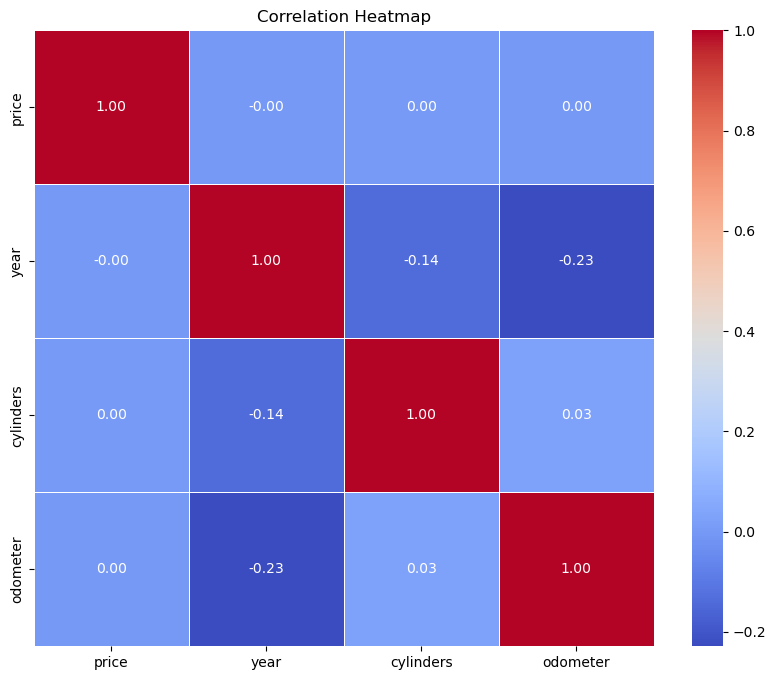

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_columns = ['price', 'year', 'cylinders', 'odometer']

# Creating a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

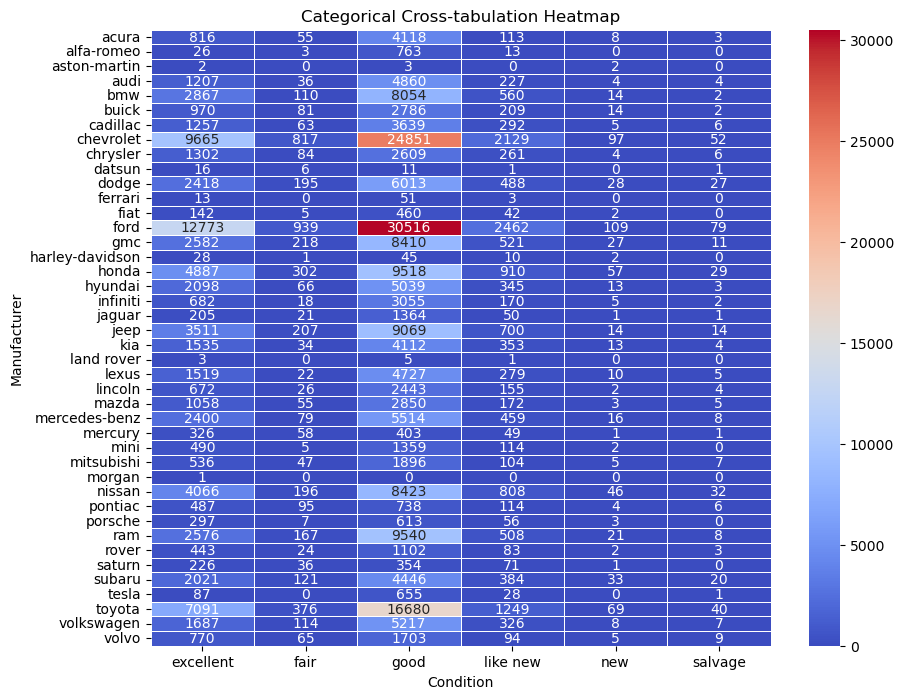

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting categorical columns
categorical_columns = ['manufacturer', 'condition', 'fuel', 'drive', 'type', 'paint_color']

# Creating a cross-tabulation of categorical variables
cross_tab = pd.crosstab(index=df['manufacturer'], columns=df['condition'])

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt="d", linewidths=0.5)
plt.title('Categorical Cross-tabulation Heatmap')
plt.xlabel('Condition')
plt.ylabel('Manufacturer')
plt.show()

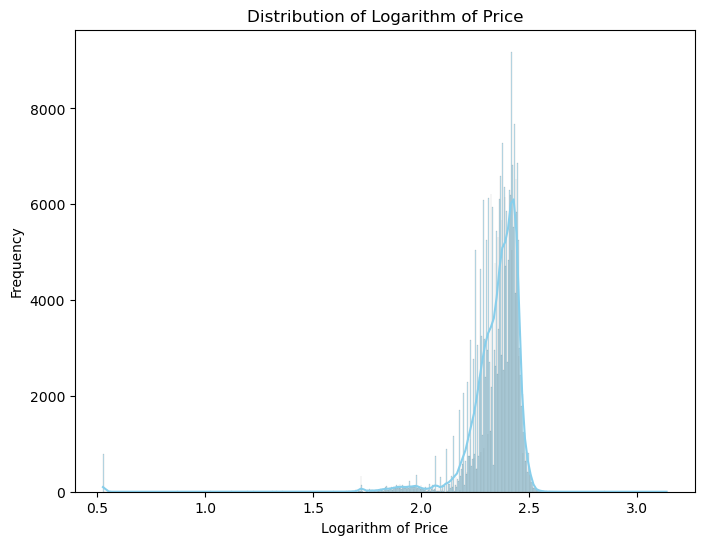

In [81]:

# Logarithmic transformation for the target variable to handle skewness
y = np.log1p(y)

plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='skyblue')
plt.title('Distribution of Logarithm of Price')
plt.xlabel('Logarithm of Price')
plt.ylabel('Frequency')
plt.show()

In [82]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns

# Preprocessing for numerical data: imputation + scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit and transform the training data, and transform the test data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)



In [83]:
# List of models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
    #'RandomForestRegressor': RandomForestRegressor(), never completed all my laptop, so could not check
}

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [84]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [85]:
# Evaluate each model
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train_prepared, X_test_prepared, y_train, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

In [86]:
for model in results:
    print(f"{model}:")
    print(f"  MSE: {results[model]['MSE']}")
    print(f"  MAE: {results[model]['MAE']}")
    print(f"  R²: {results[model]['R2']}\n")

LinearRegression:
  MSE: 0.015761945283296636
  MAE: 0.05566340566836005
  R²: 0.18117899196114706

Ridge:
  MSE: 0.015762475852267466
  MAE: 0.055661601520510265
  R²: 0.18115142930871286

Lasso:
  MSE: 0.019249931363521842
  MAE: 0.08030177309425296
  R²: -1.9218469269111083e-05



#### Model selection prior to Cross-Validation
Based on the above finding, LASSO is not selected as a model. however, let's use KFold to do cross-validation between Ridge and Linear Regression 

In [87]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


# Use Previously Define X and y


numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('num_transformer', 'passthrough')  
])

categorical_transformer = Pipeline(steps=[
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge()  # Ridge regression with default alpha=1.0
}

# Define the number of folds for K-fold cross-validation
num_folds = 5

# Perform K-fold cross-validation for Linear Regression
print("Linear Regression:")
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = (np.sqrt(-cv_scores))
    print(f"Mean RMSE for {model_name}:", np.mean(cv_rmse_scores))
    print(f"Standard deviation of RMSE for {model_name}:", np.std(cv_rmse_scores))
    print()

# Perform cross-evaluation for Ridge Regression with different alpha values
print("Ridge Regression with GridSearchCV:")
ridge_params = {'model__alpha': [0.1, 10, 100, 1000]}
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge())])
grid_search = GridSearchCV(pipeline, ridge_params, cv=num_folds, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print results
print("Best Alpha for Ridge Regression:", grid_search.best_params_['model__alpha'])
print("Best RMSE for Ridge Regression:", np.sqrt(-grid_search.best_score_))
print("Grid Search Results:")
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['param_model__alpha', 'mean_test_score', 'std_test_score']])


Linear Regression:
Mean RMSE for Linear Regression: 0.13335583391168576
Standard deviation of RMSE for Linear Regression: 0.002562904967632526

Mean RMSE for Ridge Regression: 0.14102183243516764
Standard deviation of RMSE for Ridge Regression: 0.0024457862376712648

Ridge Regression with GridSearchCV:
Best Alpha for Ridge Regression: 1000
Best RMSE for Ridge Regression: 0.14120822212727263
Grid Search Results:
  param_model__alpha  mean_test_score  std_test_score
0                0.1         -0.01994         0.01007
1                 10         -0.01994         0.01007
2                100         -0.01994         0.01007
3               1000         -0.01994         0.01007


In [89]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Use Previously Defined X and y

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('num_transformer', 'passthrough')  # Placeholder for numerical transformation
])

categorical_transformer = Pipeline(steps=[
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge()  # Ridge regression with default alpha=1.0
}

# Define the number of folds for K-fold cross-validation
num_folds = 5

train_scores = {model_name: [] for model_name in models.keys()}
val_scores = {model_name: [] for model_name in models.keys()}

#  K-fold cross-validation
for model_name, model in models.items():
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Fit the model on the training data
        pipeline.fit(X_train, y_train)

        # Training MSE
        train_score = mean_squared_error(y_train, pipeline.predict(X_train))
        train_scores[model_name].append(train_score)

        # Validation MSE
        val_score = mean_squared_error(y_val, pipeline.predict(X_val))
        val_scores[model_name].append(val_score)


mean_train_scores = {model_name: np.mean(scores) for model_name, scores in train_scores.items()}
mean_val_scores = {model_name: np.mean(scores) for model_name, scores in val_scores.items()}


print("Mean MSE for Training Set:")
for model_name, mean_train_score in mean_train_scores.items():
    print(f"{model_name}: {mean_train_score}")

print("\nMean MSE for Validation Set:")
for model_name, mean_val_score in mean_val_scores.items():
    print(f"{model_name}: {mean_val_score}")


for model_name in models.keys():
    print(f"\nThe {model_name} model Mean scrore: {mean_val_scores[model_name]} , Mean_train: {mean_train_scores[model_name]}")



Mean MSE for Training Set:
Linear Regression: 0.017784476132310524
Ridge Regression: 0.019883586853910038

Mean MSE for Validation Set:
Linear Regression: 0.017790346920154233
Ridge Regression: 0.019893139093692884

The Linear Regression model Mean scrore: 0.017790346920154233 , Mean_train: 0.017784476132310524

The Ridge Regression model Mean scrore: 0.019893139093692884 , Mean_train: 0.019883586853910038


###### Cross-Validation Conclusion
The model originally was too overfitted and I had to go back and remove more features so scores can come close with training data, in previous attempts my train score was much more. Now It looks fine after removing additional features

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

##using previously defined X and y


categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing num and cat
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols), 
        ('cat', categorical_transformer, categorical_cols)  
    ])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the pipeline to the training data
model.fit(X_train, y_train)  # This fits the ColumnTransformer and the regressor


y_pred = model.predict(X_test)




In [91]:
# Compute permutation importance on the test set
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)


transformed_feature_names = model.named_steps['preprocessor'].get_feature_names_out()

sorted_idx = perm_importance.importances_mean.argsort()

print("Feature Importances:")
for i in sorted_idx[::-1]:  # Reverse the indices to get them in descending order of importance
    print(f"{transformed_feature_names[i]}: {perm_importance.importances_mean[i]}")

Feature Importances:
num__year: 0.10355249554750631
cat__manufacturer_bmw: 0.04947123947799753
num__odometer: 0.026029867128553486
cat__manufacturer_acura: 0.017693626740144762
num__cylinders: 0.017417980515908517
cat__manufacturer_alfa-romeo: 0.012372230561153186
cat__manufacturer_aston-martin: 0.012319279343870204
cat__manufacturer_audi: 0.0077970364523539445
cat__manufacturer_buick: 0.005273387613292335


##### Findings
The above findings does not represent if these features impact the car price positively or negatively
and since this is a car dealership I took a different approach, and looked at the top 10 impacting the price positively and negativerly within each feature

In [92]:
linear_regressor = model.named_steps['regressor']
coefficients = linear_regressor.coef_
feature_names_transformed = model.named_steps['preprocessor'].get_feature_names_out()
features_with_coefficients = list(zip(feature_names_transformed, coefficients))
# Features with positive impact, sorted by coefficient magnitude
positive_impact = sorted([f for f in features_with_coefficients if f[1] > 0], key=lambda x: x[1], reverse=True)

# Features with negative impact, sorted by coefficient magnitude
negative_impact = sorted([f for f in features_with_coefficients if f[1] < 0], key=lambda x: abs(x[1]), reverse=True)

###### Top 10 Vehicles that impacts the price positively and negativerly

In [93]:


manufacturer_features = [(name, coef) for name, coef in zip(feature_names_transformed, coefficients) if 'manufacturer' in name]

# Sorting positive impact
positive_impact_manufacturers = sorted(manufacturer_features, key=lambda x: x[1], reverse=True)[:10]

# Sorting negative impact
negative_impact_manufacturers = sorted(manufacturer_features, key=lambda x: x[1])[:10]

print("Top 10 Manufacturers with Positive Impact:")
for name, coef in positive_impact_manufacturers:
    cleaned_name = name.replace('manufacturer_', '').replace('_', ' ').replace('cat ','')
    print(f"{cleaned_name}: {coef}")

print("\nTop 10 Manufacturers with Negative Impact:")
for name, coef in negative_impact_manufacturers:
    cleaned_name = name.replace('manufacturer_', '').replace('_', ' ').replace('cat ','')
    print(f"{cleaned_name}: {coef}")

Top 10 Manufacturers with Positive Impact:
 morgan: 0.27529970623285027
 ferrari: 0.12964759431496223
 aston-martin: 0.09307882976371229
 tesla: 0.0519607774270414
 alfa-romeo: 0.038874393396566204
 porsche: 0.0367208975137081
 audi: 0.01541644126426614
 datsun: 0.011334584016335572
 lincoln: 0.010417608409338796
 lexus: 0.010203065935748457

Top 10 Manufacturers with Negative Impact:
 saturn: -0.07444628771280629
 mercury: -0.06482579174694486
 harley-davidson: -0.048029907970453596
 fiat: -0.047435121036702006
 dodge: -0.041727160423898506
 chrysler: -0.03757216644261408
 pontiac: -0.03492898326649726
 mitsubishi: -0.03451294449008341
 nissan: -0.03117756415284276
 mazda: -0.029768359429124477


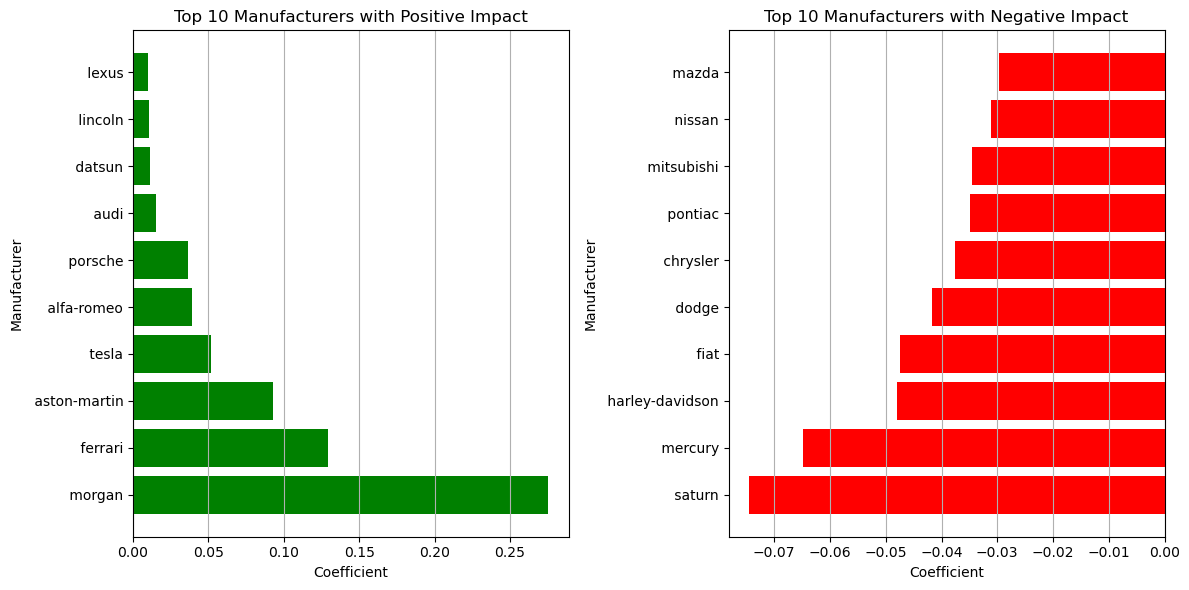

In [94]:
# Extracting top 10 manufacturers with positive impact
positive_manufacturer_names = [name.replace('manufacturer_', '').replace('_', ' ').replace('cat ','') for name, coef in positive_impact_manufacturers]
positive_manufacturer_coeffs = [coef for name, coef in positive_impact_manufacturers]

# Extracting top 10 manufacturers with negative impact
negative_manufacturer_names = [name.replace('manufacturer_', '').replace('_', ' ').replace('cat ','') for name, coef in negative_impact_manufacturers]
negative_manufacturer_coeffs = [coef for name, coef in negative_impact_manufacturers]

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting top 10 manufacturers with positive impact
axes[0].barh(positive_manufacturer_names, positive_manufacturer_coeffs, color='green')
axes[0].set_xlabel('Coefficient')
axes[0].set_ylabel('Manufacturer')
axes[0].set_title('Top 10 Manufacturers with Positive Impact')
axes[0].grid(axis='x')

# Plotting top 10 manufacturers with negative impact
axes[1].barh(negative_manufacturer_names, negative_manufacturer_coeffs, color='red')
axes[1].set_xlabel('Coefficient')
axes[1].set_ylabel('Manufacturer')
axes[1].set_title('Top 10 Manufacturers with Negative Impact')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

#### Conclusion
The most importanant features that Customers look and value in a car are:
   * Age of the car
   * Milage of the car
   * Efficincy / Number of cyclinders
   * and manufactuer of the car
    
Based on the information gathered using LinearRegression Modeling, we also dtermined the top 10 cars that positively impact the price of the car and also those that negatively impacts the car price. Hence the cars with negative price impact may lose value faster when remaining on the lot.